In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

weather = pd.read_csv('weather.csv')

In [2]:
weather.head()

,year,month,temperature
0,1812,January,NaN
1,1813,January,-9.6
2,1814,January,-2.4
3,1815,January,-10.8
4,1816,January,-2.6


In [3]:
weather.tail()

,year,month,temperature
2383,2010,December,-4.2
2384,2011,December,2.2
2385,2012,December,-5.0
2386,2013,December,-0.2
2387,2014,December,-2.1


In [4]:
weather.dtypes

year             int64
month           object
temperature    float64
dtype: object

In [5]:
weather = weather.dropna()

weather['temperature'] =  weather['temperature'].astype('int64')

(array([  15.,   91.,  222.,  453.,  234.,  257.,  229.,  350.,  462.,   70.]),
 array([-15., -11.,  -7.,  -3.,   1.,   5.,   9.,  13.,  17.,  21.,  25.]),
 <a list of 10 Patch objects>)

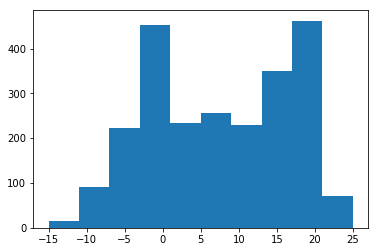

In [6]:
#create basic histogram
plt.hist(x=weather.temperature)

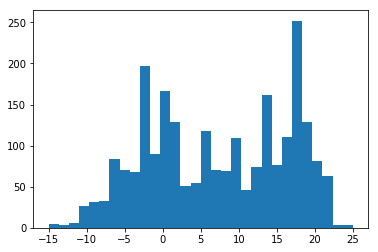

In [7]:
#change number of bins
plt.hist(x=weather.temperature, bins = 30)
plt.show()

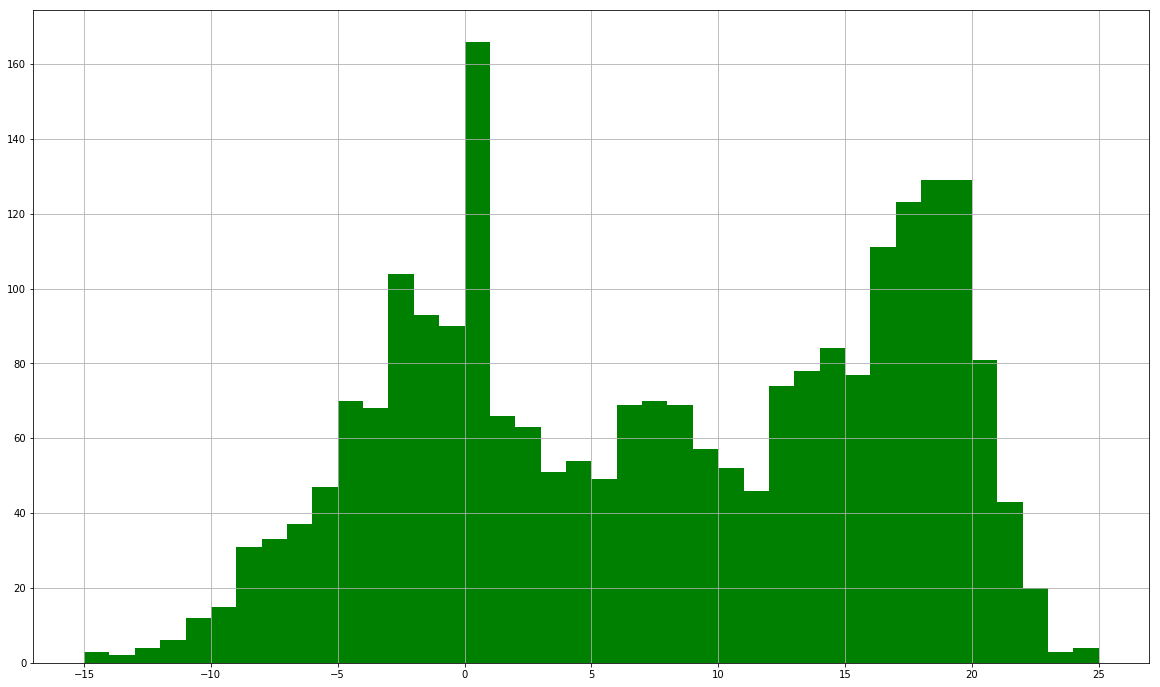

In [58]:
#change bin size & customise look

#calculate number of bins according to binsize
bins = range(min(weather['temperature']), max(weather['temperature'])+1, 1)

plt.figure(figsize = [20, 12])

plt.hist(x=weather.temperature, bins=bins, color = 'g')

plt.grid()

plt.show()

In [9]:
#add 'season' variable
def get_season(month):
    if month in ['January', 'February', 'December']: return 'winter'
    elif month in ['March', 'April', 'May']: return 'spring'
    elif month in ['June', 'July', 'August']: return 'summer'
    elif month in ['September', 'October', 'November']: return 'autumn'
    
weather['season'] = weather['month'].apply(get_season)

bins = range(min(weather['temperature']), max(weather['temperature'])+1, 1)

weather.season.unique()

array(['winter', 'spring', 'summer', 'autumn'], dtype=object)

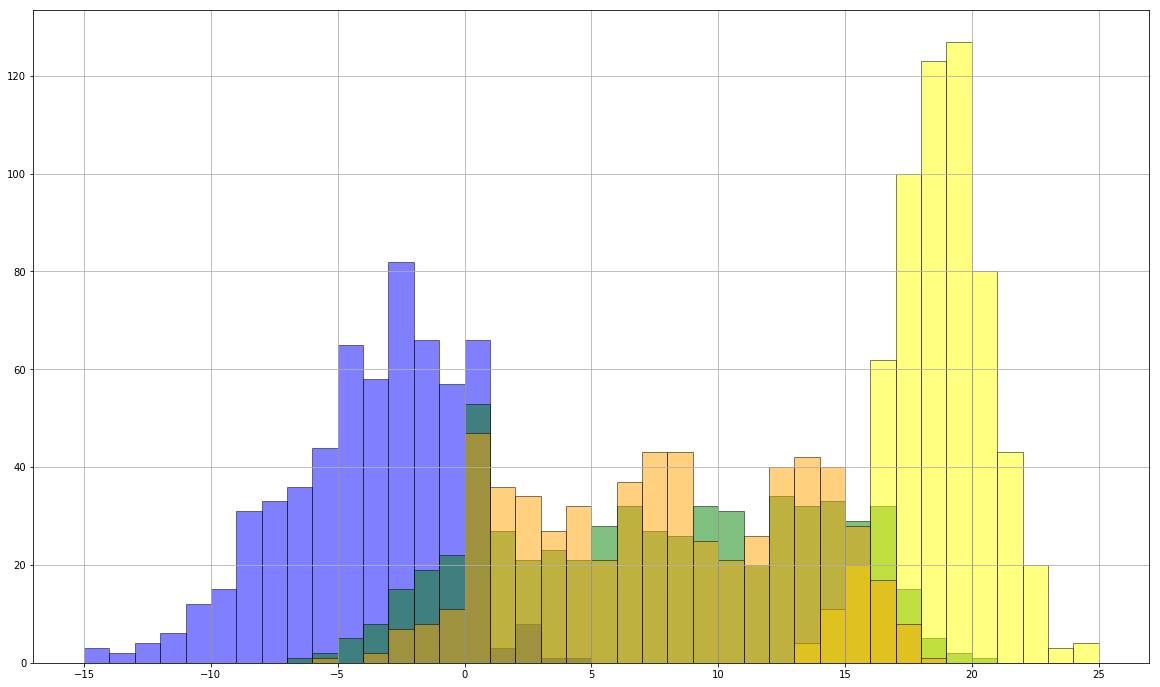

In [59]:
#color by season
bins = range(min(weather['temperature']), max(weather['temperature'])+1, 1)

colors = {'winter':'blue', 'spring':'green', 'summer':'yellow', 'autumn':'orange'}

plt.figure(figsize = [20, 12])

for season in weather.season.unique():
    plt.hist(weather[weather.season == season].temperature, 
             color = colors[season],
             bins = bins, edgecolor = 'black', alpha = 0.5)
    
plt.grid()
plt.show()

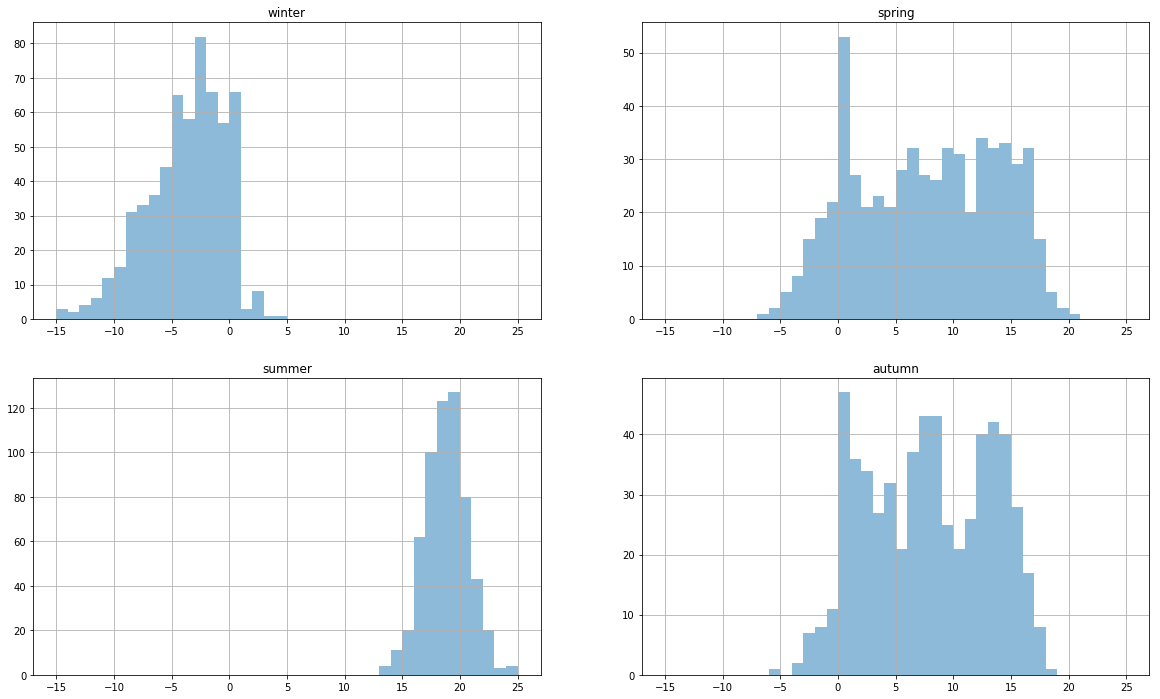

In [11]:
#plot every season on a diferent panel
bins = range(min(weather['temperature']), max(weather['temperature'])+1, 1)

plt.figure(figsize = [20, 12])

for i in range(0, len(weather.season.unique())):
        plt.subplot(2, 2, i+1)
        plt.hist(weather[weather.season == weather.season.unique()[i]].temperature, 
                 bins = bins, 
                 edgecolor = 'none', alpha = 0.5)
        plt.title(weather.season.unique()[i])
        plt.grid()

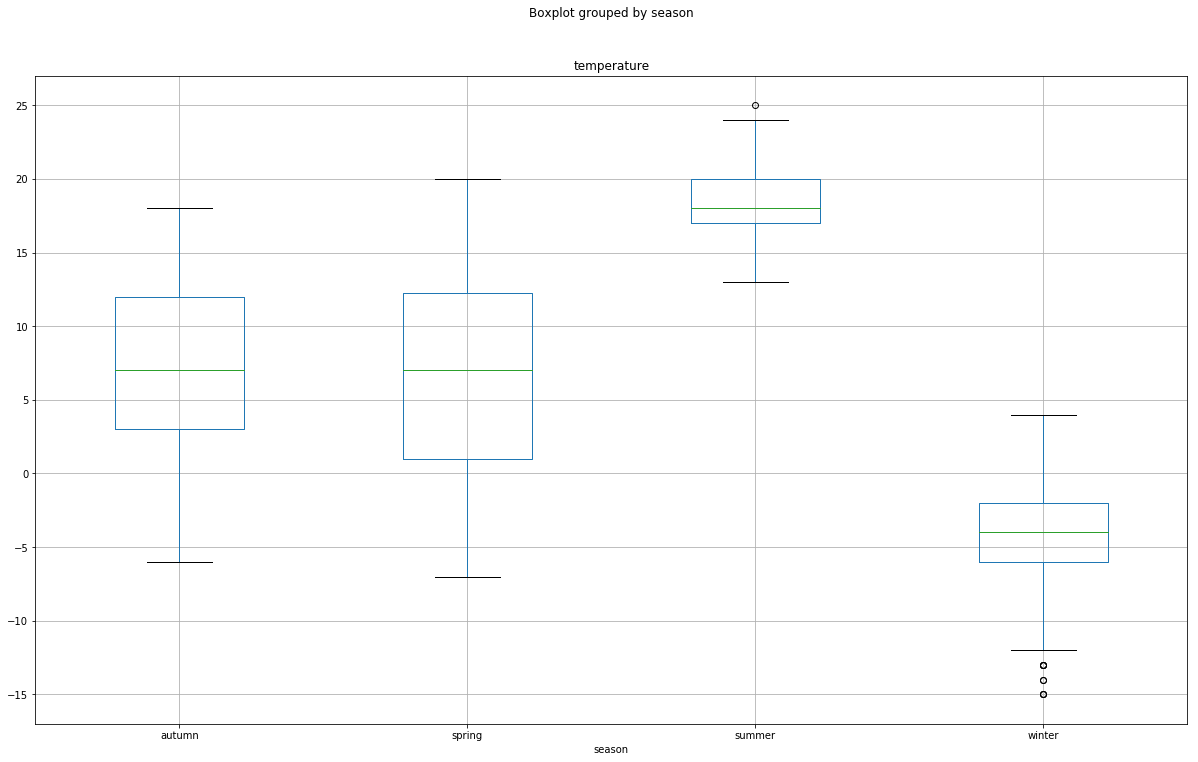

In [12]:
#make simple boxplot
weather.boxplot(column= 'temperature', by = 'season', figsize=[20, 12])

In [13]:
#convert season to factor
weather.season = pd.Categorical(weather.season)
weather.season.dtype

category

In [14]:
#give season factor an order
weather.season.cat.reorder_categories(['winter', 'spring', 'summer', 'autumn'], inplace=True)
pd.CategoricalIndex(weather.season)

CategoricalIndex(['winter', 'winter', 'winter', 'winter', 'winter', 'winter',
                  'winter', 'winter', 'winter', 'winter',
                  ...
                  'winter', 'winter', 'winter', 'winter', 'winter', 'winter',
                  'winter', 'winter', 'winter', 'winter'],
                 categories=['winter', 'spring', 'summer', 'autumn'], ordered=False, dtype='category', length=2383)

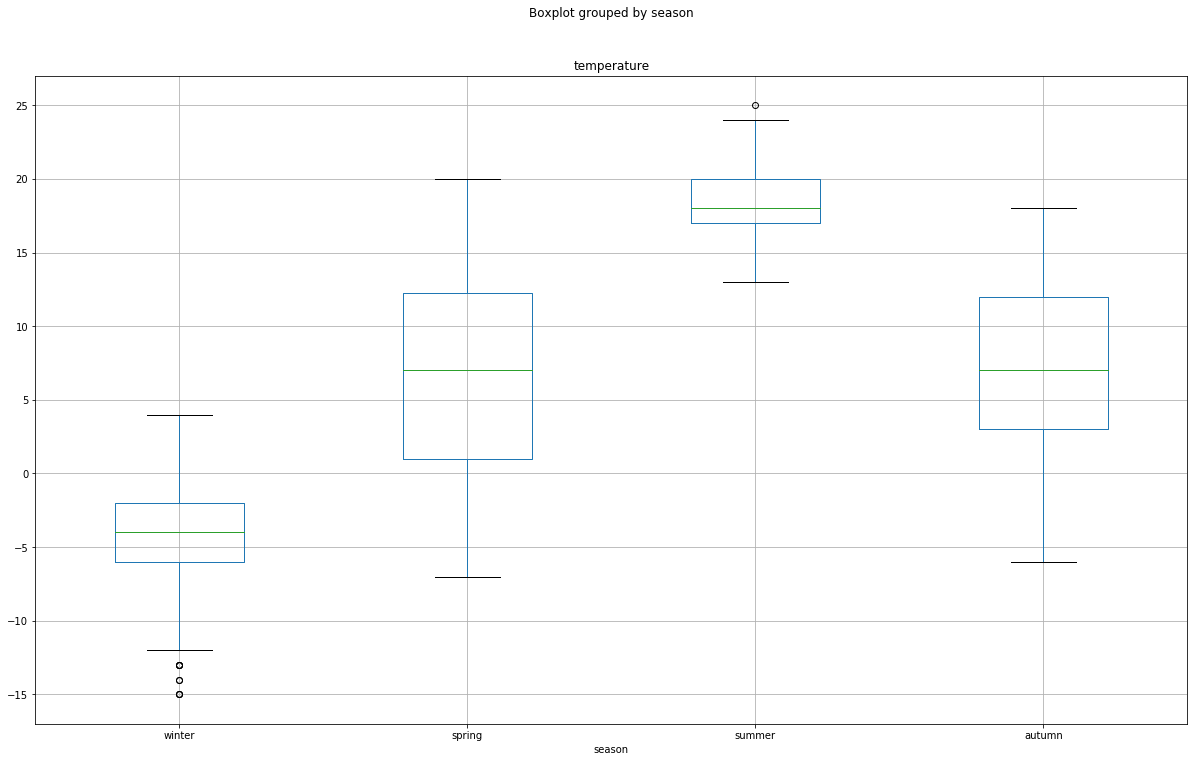

In [20]:
#make simple boxplot i said
weather.boxplot(column= 'temperature', by = 'season', figsize=[20, 12])

In [36]:
#get levels of 'month' factor
weather.month_num = pd.factorize(weather.month)[0]
weather.head()

,year,month,temperature,season,month_num
1,1813,January,-9,winter,0
2,1814,January,-2,winter,0
3,1815,January,-10,winter,0
4,1816,January,-2,winter,0
5,1817,January,-1,winter,0


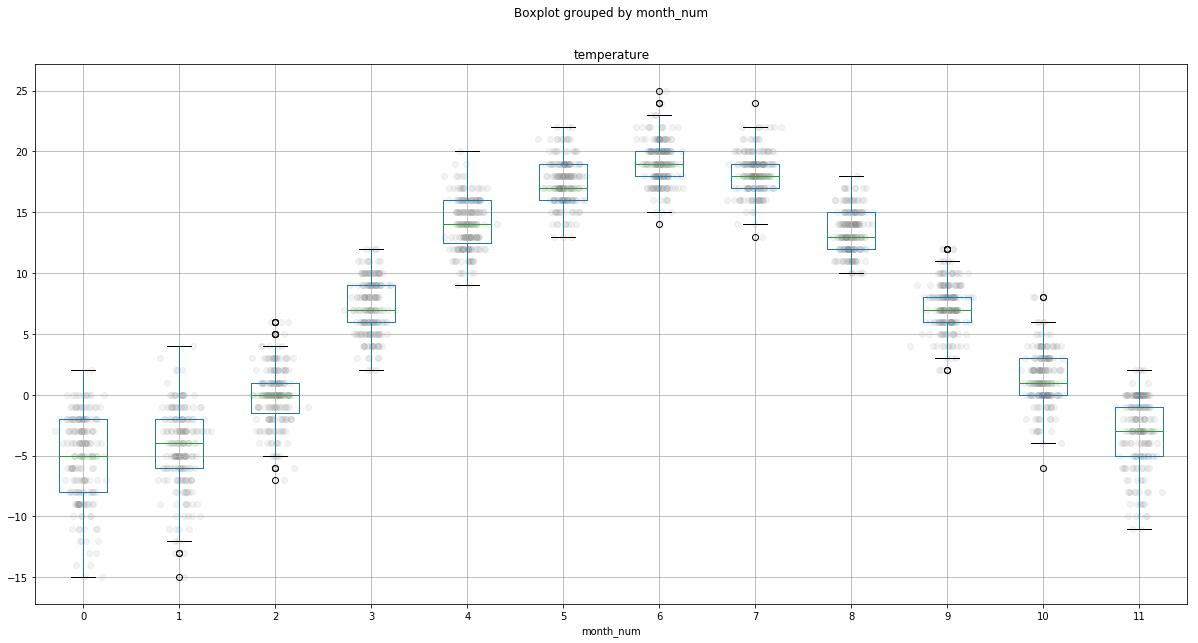

In [53]:
#combine boxplot and jitter plot
import numpy as np
plt.rcParams['figure.figsize'] = [20, 10]

weather.boxplot(column = 'temperature', by = 'month_num')

for i in weather.month_num.unique():
    y = weather.temperature[weather.month_num==i].dropna()
    x = np.random.normal(i+1, 0.09, size=len(y))
    plt.scatter(x = x, y = y, alpha=0.09, c = 'grey')
    plt.grid(True)

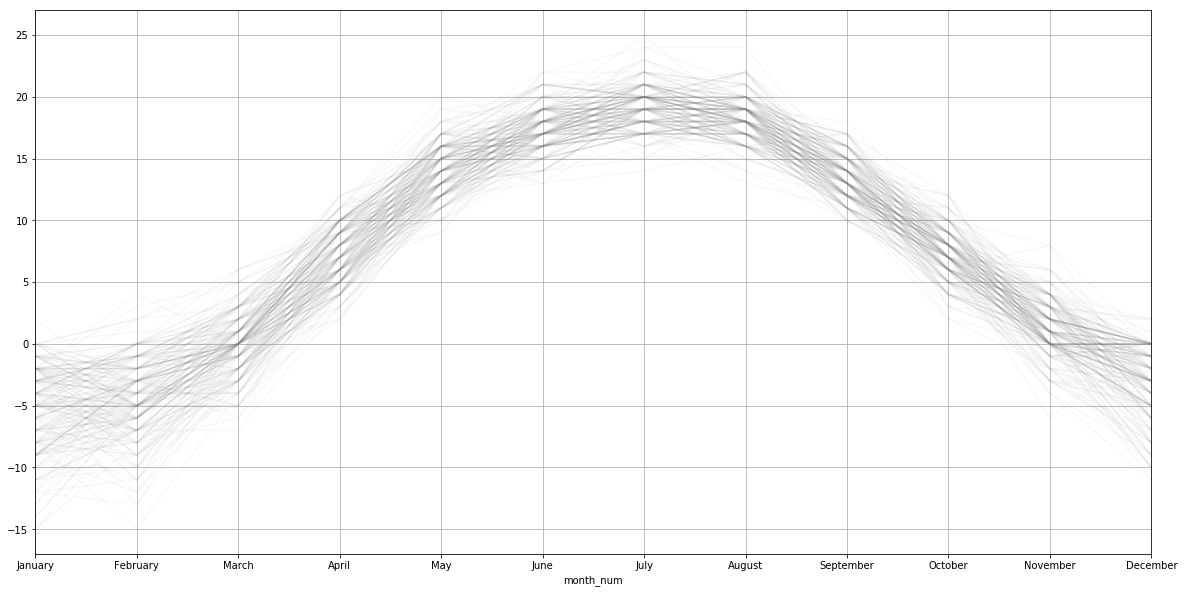

In [57]:
#create line graph
fig, ax = plt.subplots(1,1)
weather.groupby('year').plot(x = 'month_num', y = 'temperature', ax=ax, c = 'grey', alpha = 0.05)
ax.legend_.remove()
plt.xticks(range(0, 12, 1), weather.month.unique())
plt.grid()

In [72]:
#aggregae data
tempmedian = weather.groupby('month_num')['temperature'].agg({'median':'median'})
tempmedian.head()

,median
month_num,
0,-5
1,-4
2,0
3,7
4,14


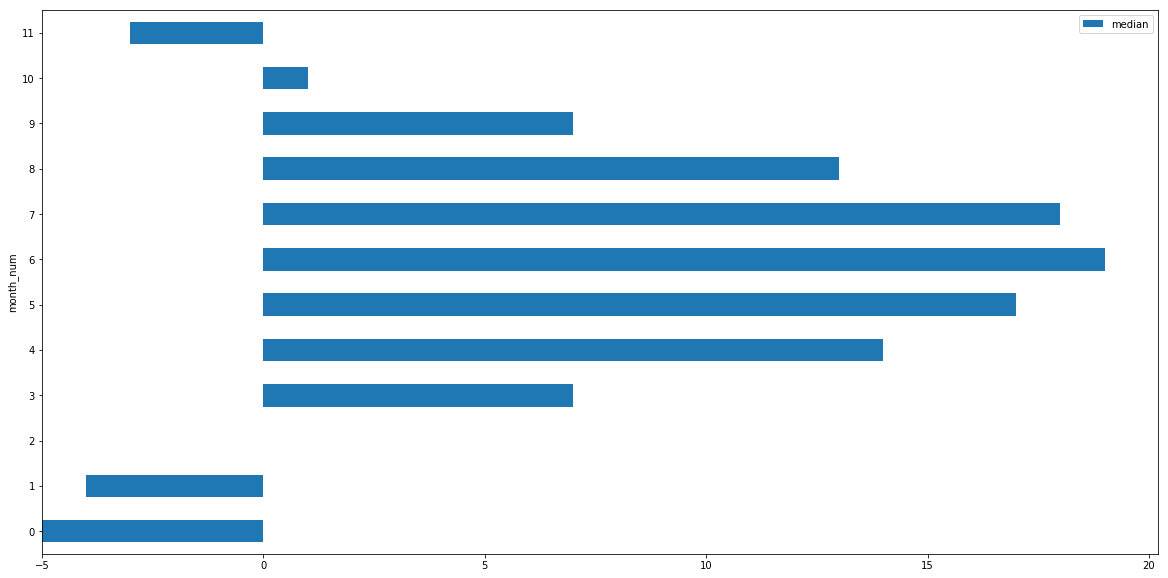

In [75]:
#barchart with pandas
tempmedian.plot(kind='barh')

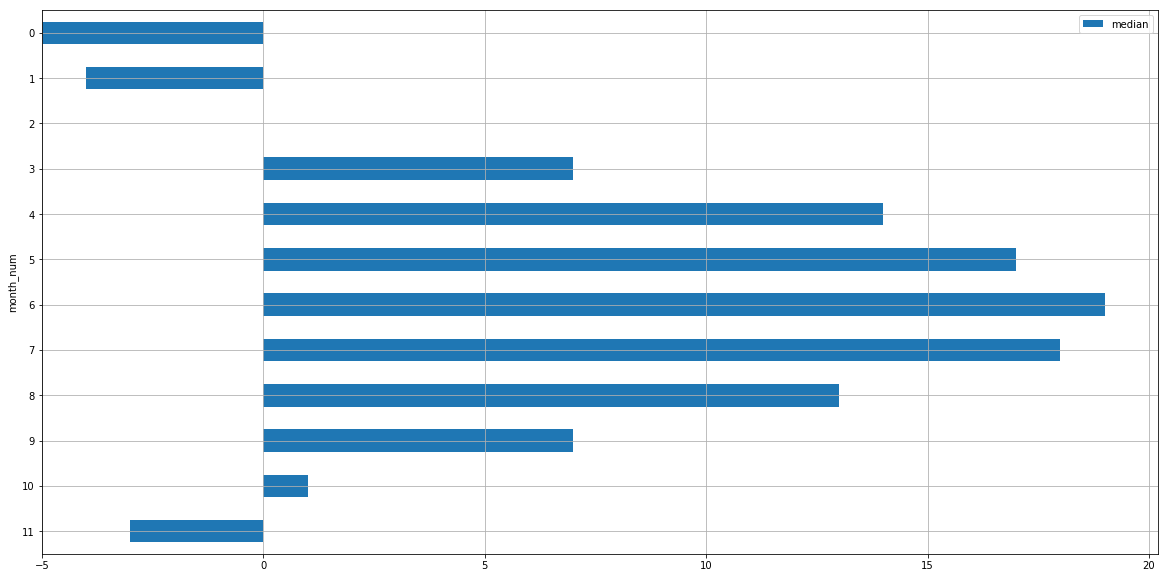

In [80]:
#reverse order
tempmedian.plot(kind='barh')
plt.ylim(plt.ylim()[::-1])
plt.grid()

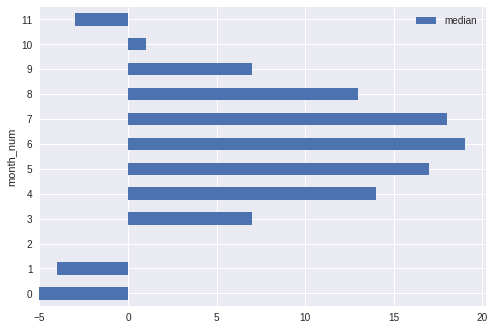

In [82]:
#make it look better with a little help of seaborn
import seaborn as sns
tempmedian.plot(kind='barh')

/home/andriy/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


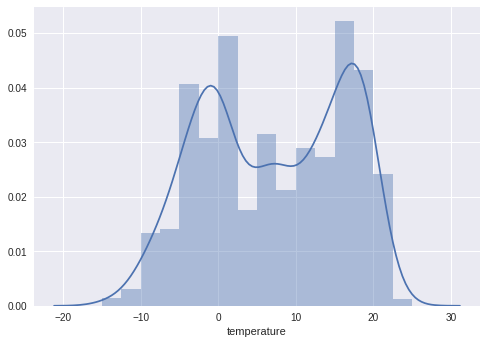

In [85]:
#default seaborn histogram
sns.distplot(weather.temperature)

/home/andriy/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


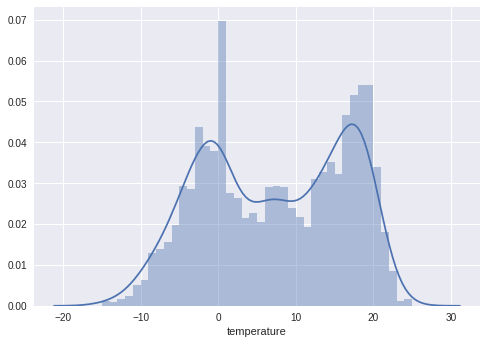

In [86]:
#change number of bins
sns.distplot(weather.temperature, bins = range(min(weather['temperature']), max(weather['temperature'])+1, 1))

/home/andriy/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


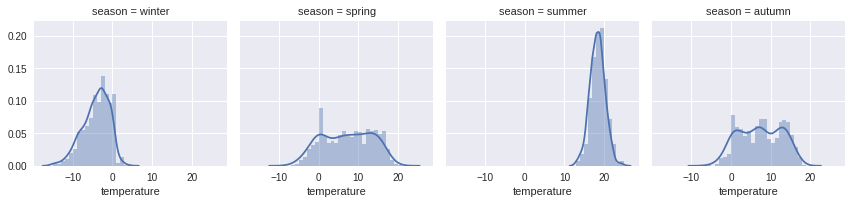

In [89]:
#small mutliples with seaborn
g = sns.FacetGrid(weather, col = 'season')
g = g.map(sns.distplot, 'temperature', bins = range(min(weather['temperature']), max(weather['temperature'])+1, 1))

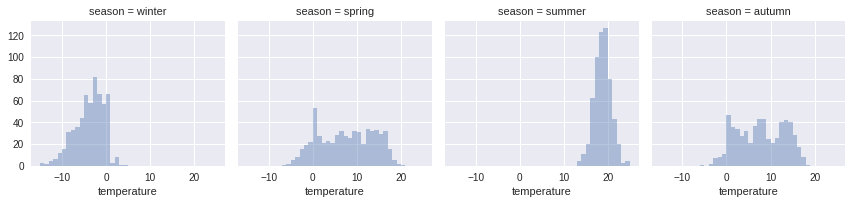

In [94]:
#small multiples with seaborn
g = sns.FacetGrid(weather, col = 'season')
g = g.map(sns.distplot, 'temperature', bins = range(min(weather['temperature']), max(weather['temperature'])+1, 1), norm_hist = False, kde = False)

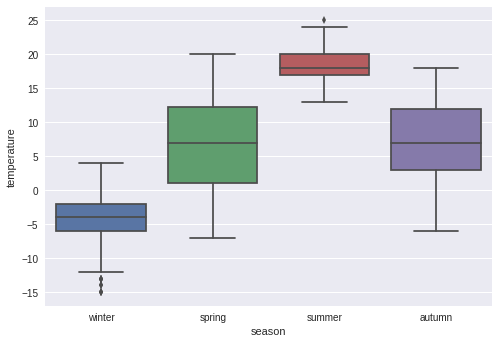

In [90]:
#default boxplot
sns.boxplot(x = weather.season, y = weather.temperature)

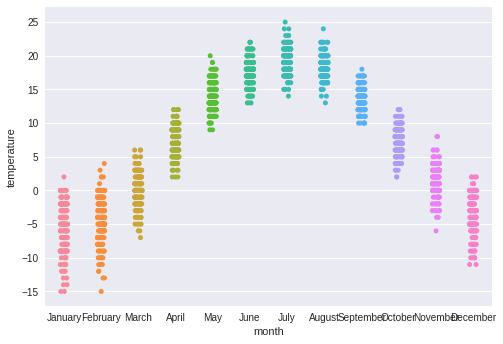

In [95]:
#create jitterplot with seaborn
sns.stripplot(x='month', y='temperature', data=weather, jitter=True);

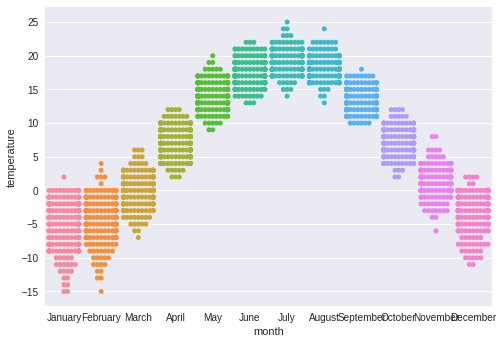

In [96]:
#create swarmplot with seaborn
sns.swarmplot(x='month', y='temperature', data=weather)